# Visão geral do projeto


Você trabalha na empresa de mineração OilyGiant. Sua tarefa é encontrar os melhores lugares para o **Desenvolvimento de novos poços de petróleo**.

Para concluir essa tarefa, você vai precisar executar as seguintes etapas:

+ Ler os arquivos com parâmetros coletados de poços de petróleo na região selecionada: a quantidade de petróleo e o volume de reservas;
+ Construir um modelo para predizer o volume de reservas em novos poços;
+ Escolher os poços de petróleo que têm os maiores valores estimados;
+ Escolher a região com o maior lucro total para os poços de petróleo selecionados.

Você tem dados sobre amostras de petróleo de três regiões.
Os parâmetros de cada poço de petróleo na região já são conhecidos. Construa um modelo que te ajudará a escolher a região com a margem de lucro mais alta. Utilize a técnica de Bootstrapping para analisar lucro potencial e riscos.

# Descrição dos dados

Os dados de exploração geológica para as três regiões estão armazenados em arquivos:

+ geo_data_0 conjunto de dados
+ geo_data_1 conjunto de dados
+ geo_data_2 conjunto de dados
+ id — identificador unívoco de poço de petróleo
+ f0, f1, f2 — três características de pontos (seu significado específico não é importante, mas as próprias características são significativas)
+ product — volume de reservas no poço de petróleo (milhares de barris).

# Condições

+ Apenas regressão linear deve ser usada para o treinamento do modelo.
+ Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
+ O orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
+ Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).
+ Depois de ter avaliado os riscos, mantenha apenas as regiões com o risco de perdas inferior a 2.5%. Entre aquelas que se enquadram no critério, você precisa selecionar a região com o lucro médio mais alto.
+ Os dados são sintéticos e não incluem nenhum detalhe de contratos ou características de poços.

## Bibliotecas utilizadas

In [235]:

import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression



## Importando os Dados

### Importando os Dados geodata 0

In [236]:
#local_0
df_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


#### numeros duplicados

In [237]:
df_0.duplicated().sum()

0

#### informação Dados geodata 0

In [238]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### numeros Nulos

In [239]:
df_0[['id','f0','f1','f2']].isna().sum()

id    0
f0    0
f1    0
f2    0
dtype: int64

#### estatistica dos Dados geodata 0

In [240]:
df_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


#### correlação dos dados geodata 0

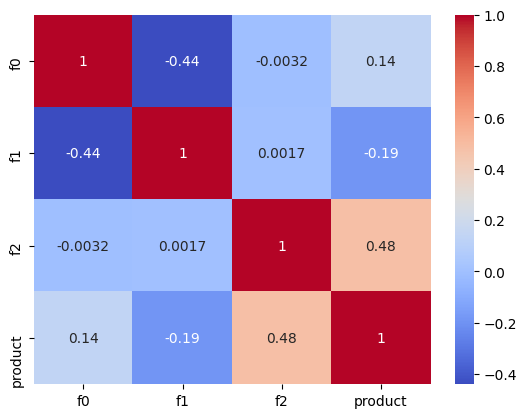

In [241]:
corr = df_0.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot= True);

#### Grafico de distribuição

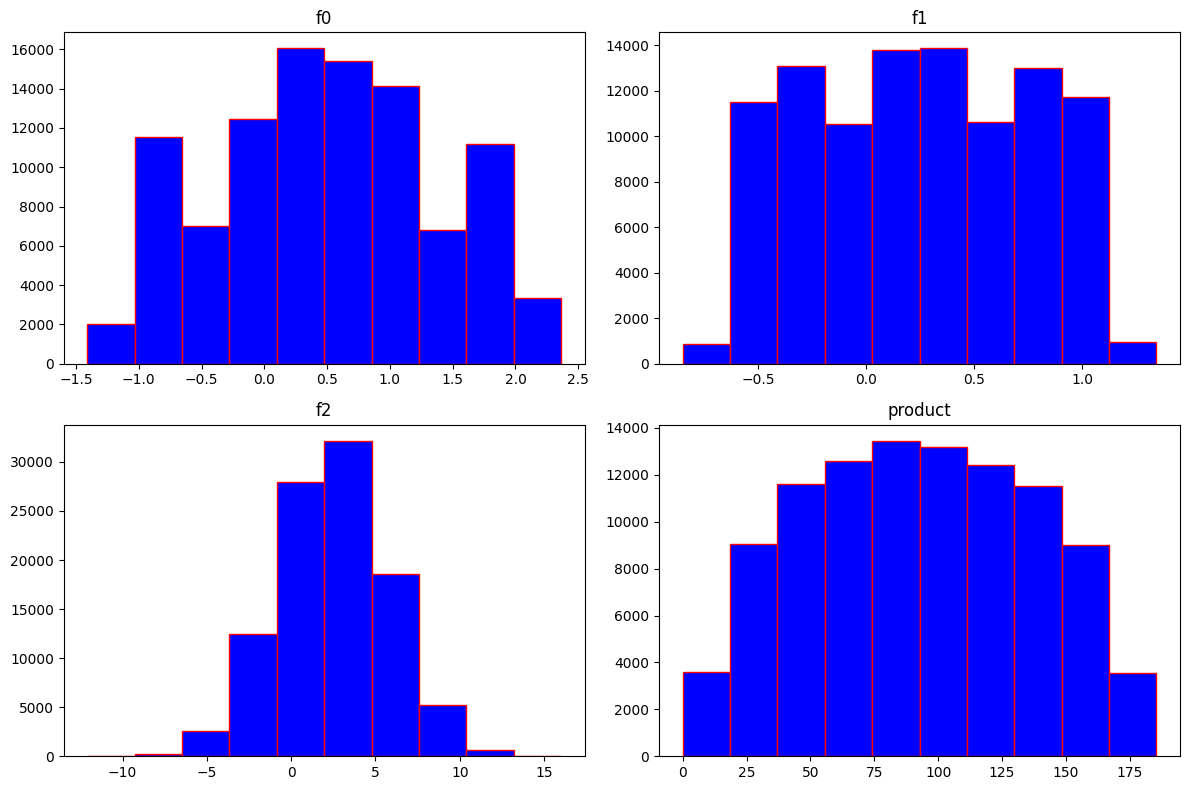

In [242]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histograma de f0
axes[0, 0].hist(df_0['f0'], bins=10, color='blue', edgecolor='red')
axes[0, 0].set_title('f0')

# Histograma de f1
axes[0, 1].hist(df_0['f1'], bins=10, color='blue', edgecolor='red')
axes[0, 1].set_title('f1')

# Histograma de f2
axes[1, 0].hist(df_0['f2'], bins=10, color='blue', edgecolor='red')
axes[1, 0].set_title('f2')

# Histograma de product
axes[1, 1].hist(df_0['product'], bins=10, color='blue', edgecolor='red')
axes[1, 1].set_title('product')


plt.tight_layout()
plt.show()


### Importando os Dados geodata 1

In [243]:
#Local_1
df_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


#### valores duplicados

In [244]:
df_1.duplicated().sum()

0

#### informação Dados geodata 1

In [245]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Numeros nulos

In [246]:
df_1[['id','f0','f1','f2']].isna().sum()

id    0
f0    0
f1    0
f2    0
dtype: int64

#### Estatistica dos Dados geodata 1

In [247]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


#### correlação dos dados geodata 1

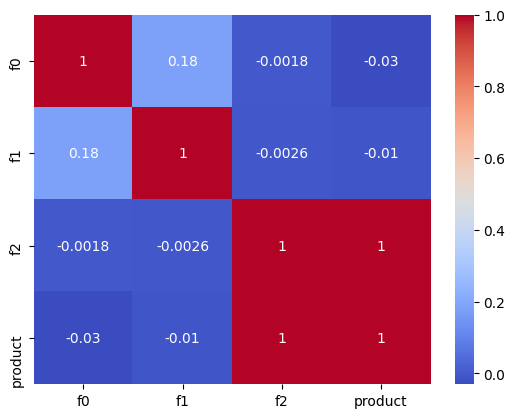

In [248]:
corr = df_1.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot= True);

#### Grafico de distribuição

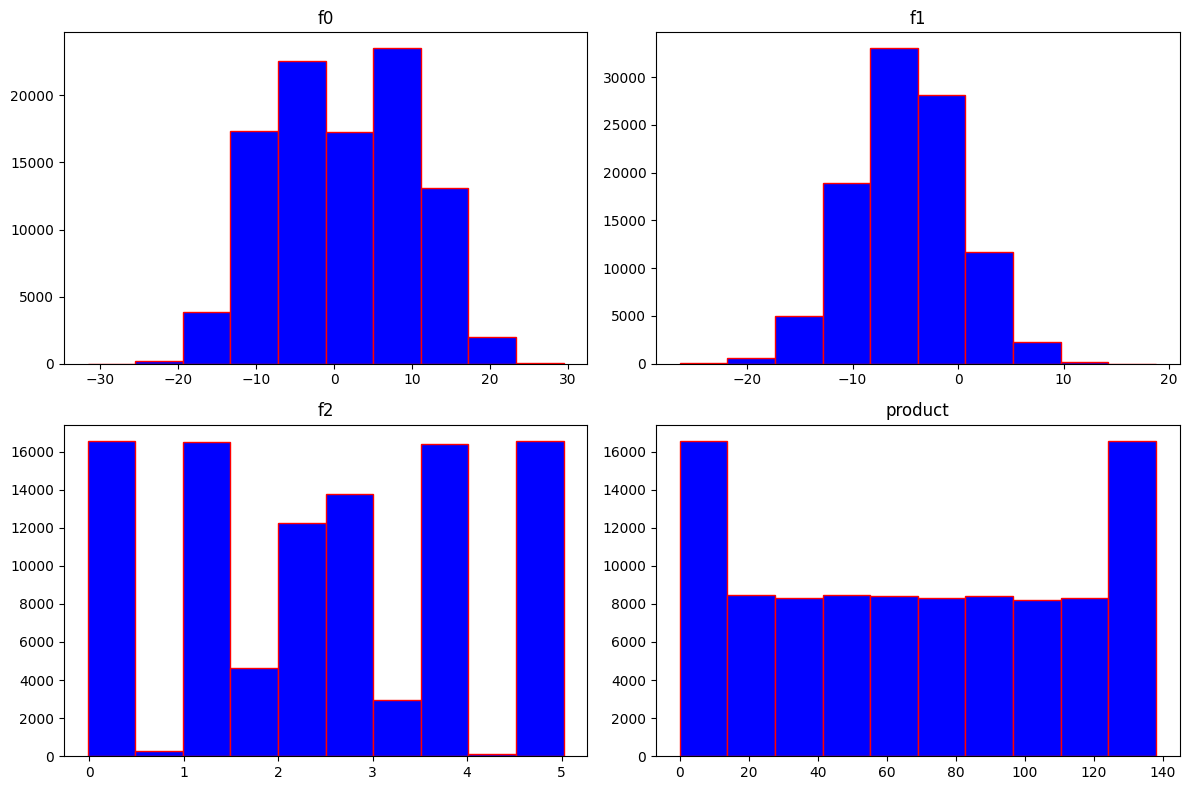

In [249]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histograma de f0
axes[0, 0].hist(df_1['f0'], bins=10, color='blue', edgecolor='red')
axes[0, 0].set_title('f0')

# Histograma de f1
axes[0, 1].hist(df_1['f1'], bins=10, color='blue', edgecolor='red')
axes[0, 1].set_title('f1')

# Histograma de f2
axes[1, 0].hist(df_1['f2'], bins=10, color='blue', edgecolor='red')
axes[1, 0].set_title('f2')

# Histograma de product
axes[1, 1].hist(df_1['product'], bins=10, color='blue', edgecolor='red')
axes[1, 1].set_title('product')


plt.tight_layout()
plt.show()

### Importando os Dados geodata 2

In [250]:
#Local_2
df_2 = pd.read_csv('/datasets/geo_data_2.csv')
df_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


#### Valore duplicados

In [251]:
df_2.duplicated().sum()

0

#### informação Dados geodata 2

In [252]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


#### Numeros nulos

In [254]:
df_2[['id','f0','f1','f2']].isna().sum()

id    0
f0    0
f1    0
f2    0
dtype: int64

#### Estatistica dos Dados geodata 2

In [253]:
df_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


#### Correlação dos dados geodata 2

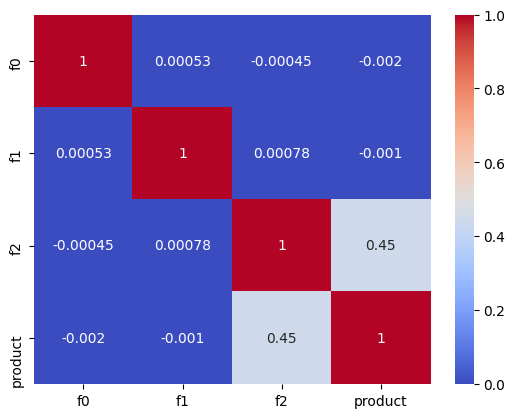

In [21]:
corr = df_2.corr()
sns.heatmap(corr, cmap = 'coolwarm', annot= True);

#### Grafico de distribuição

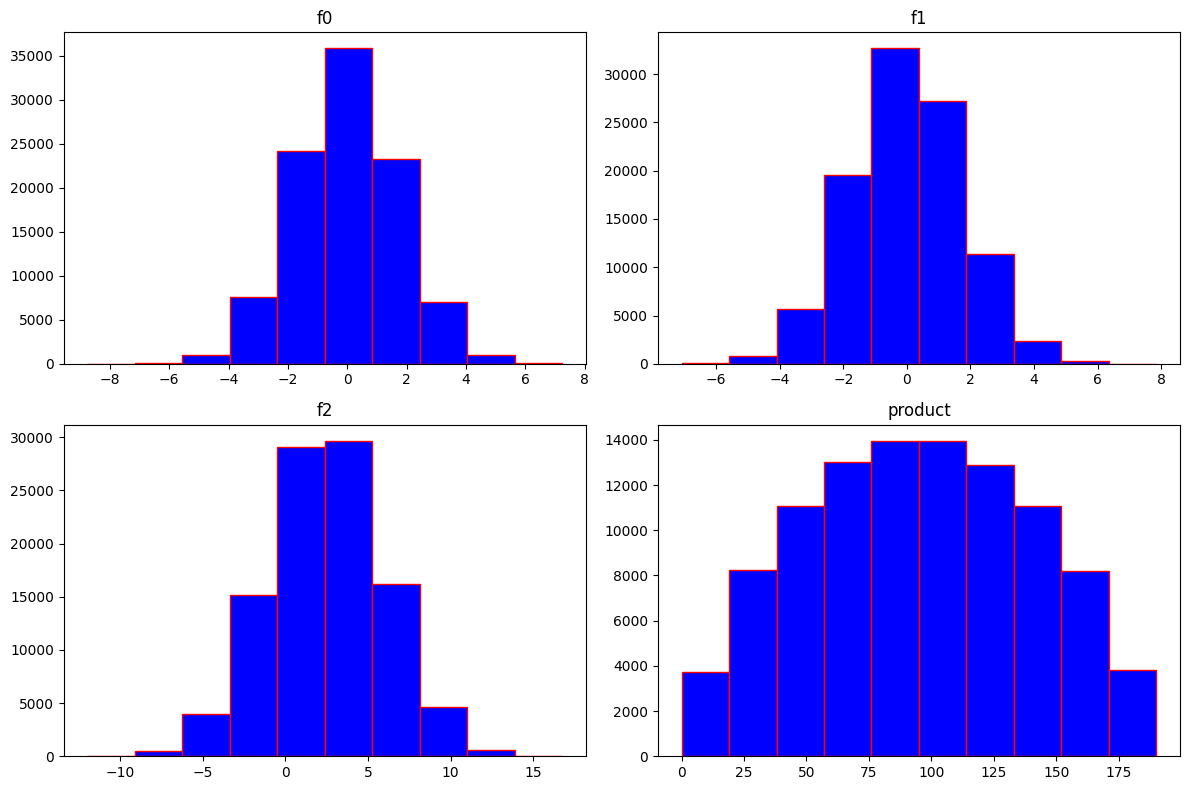

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histograma de f0
axes[0, 0].hist(df_2['f0'], bins=10, color='blue', edgecolor='red')
axes[0, 0].set_title('f0')

# Histograma de f1
axes[0, 1].hist(df_2['f1'], bins=10, color='blue', edgecolor='red')
axes[0, 1].set_title('f1')

# Histograma de f2
axes[1, 0].hist(df_2['f2'], bins=10, color='blue', edgecolor='red')
axes[1, 0].set_title('f2')

# Histograma de product
axes[1, 1].hist(df_2['product'], bins=10, color='blue', edgecolor='red')
axes[1, 1].set_title('product')


plt.tight_layout()
plt.show()

## Treinamento do Modelo

### Definindo as características do modelo, todas exceto "Product" e "id"

In [220]:
features_0 = df_0.drop(['product', 'id'], axis=1)
features_1 = df_1.drop(['product', 'id'], axis=1)
features_2 = df_2.drop(['product', 'id'], axis=1)

# Defininindo os objetivos
target_0 = df_0['product']
target_1 = df_1['product']
target_2 = df_2['product']

## Local_0

#### Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação

In [24]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0,target_0 , test_size=0.25, random_state=12345)

#### Conferindo se os dados foram separados corretamente

In [25]:
print('Tamanho do conjunto features_train_0:',len(features_train_0)/len(features_0)*100,"%")
print('Tamanho do conjunto target_train_0:', len(target_train_0)/len(target_0)*100, "%")

Tamanho do conjunto features_train_0: 75.0 %
Tamanho do conjunto target_train_0: 75.0 %


#### Treinando o modelo de Regressão Linear

In [26]:
model = LinearRegression()
model.fit(features_train_0,target_train_0) 
predictions_valid_0 = model.predict(features_valid_0)

####  Calculando o REQM do conjunto de validação

In [27]:
result = mean_squared_error(target_valid_0, predictions_valid_0) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O REQM do modelo de regressão linear no conjunto de validação: 37.5794217150813


#### Calculando o valor médio de reservas da predição

In [28]:
med_0 = predictions_valid_0.mean()
print("O valor médio no conjunto de validação do local_0:", med_0)

O valor médio no conjunto de validação do local_0: 92.59256778438035


#### Salvando as predições e respostas corretas para o conjunto de validação

In [29]:
valid_0 = pd.DataFrame({'target_valid': target_valid_0, 'predictions_valid': predictions_valid_0})
valid_0.head(10)

,target_valid,predictions_valid
71751,10.038645,95.894952
80493,114.551489,77.572583
2655,132.603635,77.892640
53233,169.072125,90.175134
91141,122.325180,70.510088
9539,37.735331,69.127076
8482,139.227191,125.106759
30284,72.491987,87.643849
66393,11.465993,86.035871
99584,110.562031,98.655311


O REQM (Erro Quadrático Médio) do modelo de regressão linear no conjunto de validação está acima de 0. No entanto, ao compará-lo com o valor médio do nosso conjunto de validação, podemos considerar o valor do REQM aceitável, pois a média é quase três vezes maior que a diferença do REQM.

### Local_1

#### Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação

In [30]:
features_train_1, features_valid_1, target_train_1, target_valid_1= train_test_split(
    features_1,target_1 , test_size=0.25, random_state=12345)

#### Conferindo se os dados foram separados corretamente

In [31]:
print('Tamanho do conjunto features_train_1:',len(features_train_1)/len(features_1)*100,"%")
print('Tamanho do conjunto target_train_1:', len(target_train_1)/len(target_1)*100, "%")

Tamanho do conjunto features_train_1: 75.0 %
Tamanho do conjunto target_train_1: 75.0 %


#### Treinando o modelo de Regressão Linear Local_1

In [32]:
model = LinearRegression()
model.fit(features_train_1,target_train_1) 
predictions_valid_1 = model.predict(features_valid_1)

#### Calculando o REQM do conjunto de validação Local_1

In [33]:
result = mean_squared_error(target_valid_1, predictions_valid_1) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)

O REQM do modelo de regressão linear no conjunto de validação: 0.893099286775617


#### Calculando o valor médio de reservas da predição

In [34]:
med_1 = predictions_valid_1.mean()
print("O valor médio no conjunto de validação do local_1:", med_1)

O valor médio no conjunto de validação do local_1: 68.728546895446


#### Respostas corretas para o conjunto de validação

In [35]:
valid_1 = pd.DataFrame({'target_valid': target_valid_1, 'predictions_valid': predictions_valid_1})
valid_1.head(10)

,target_valid,predictions_valid
71751,80.859783,82.663314
80493,53.906522,54.431786
2655,30.132364,29.748760
53233,53.906522,53.552133
91141,0.000000,1.243856
9539,110.992147,111.438490
8482,137.945408,137.134374
30284,84.038886,82.888902
66393,110.992147,110.897311
99584,26.953261,29.219306


O REQM do modelo de regressão linear do conjunto de validação está bem próximo de 0, ou seja, quase não existe variação entre o conjunto de validação e o de teste. Podemos dizer que os valores são mais confiáveis que as demais regiões.

### Local_2

#### Separando os dados para treino e teste, colocando 75% em terinamento e o resto em validdação

In [36]:
features_train_2, features_valid_2, target_train_2, target_valid_2= train_test_split(
    features_2,target_2 , test_size=0.25, random_state=12345)

#### Conferindo se os dados foram separados corretamente

In [37]:
print('Tamanho do conjunto features_train_2:',len(features_train_2)/len(features_2)*100,"%")
print('Tamanho do conjunto target_train_2:', len(target_train_2)/len(target_2)*100,"%")

Tamanho do conjunto features_train_2: 75.0 %
Tamanho do conjunto target_train_2: 75.0 %


#### Treinando o modelo de Regressão Linear

In [38]:
model = LinearRegression()
model.fit(features_train_2,target_train_2) 
predictions_valid_2 = model.predict(features_valid_2)

####  Calculando o REQM do conjunto de validação

In [39]:
result = mean_squared_error(target_valid_2, predictions_valid_2) ** 0.5
print("O REQM do modelo de regressão linear no conjunto de validação:", result)


O REQM do modelo de regressão linear no conjunto de validação: 40.02970873393434


####  Calculando o valor médio de reservas da predição

In [40]:
med_2 = predictions_valid_2.mean()
print("O valor médio no conjunto de validação do local_2:", med_2)

O valor médio no conjunto de validação do local_2: 94.96504596800489


####  Salvando as predições e respostas corretas para o conjunto de validação

In [41]:
valid_2 = pd.DataFrame({'target_valid': target_valid_2, 'predictions_valid': predictions_valid_2})
valid_2.head(10)

,target_valid,predictions_valid
71751,61.212375,93.599633
80493,41.850118,75.105159
2655,57.776581,90.066809
53233,100.053761,105.162375
91141,109.897122,115.303310
9539,105.904629,121.939197
8482,51.646180,119.053040
30284,173.162121,75.396575
66393,113.143072,111.400543
99584,56.803215,84.029320


É possível perceber que o REQM do modelo de regressão linear do conjunto de validação está bem acima de 0, mas ao comparar com o valor médio do nosso conjunto de validação, percebemos que o valor médio está mais que o dobro de diferença do REQM, não considero essa diferença média entre o modelo e o teste aceitável pois pode interfeir na previsão de forma mais acentuada.

## Cálculo do Lucro

###  Custo para desenvolvimento de 200 poços

In [212]:
custo_200 = 100000000
custo_1 = custo_200/200
custo_1

500000.0

### Receita por unidade de produto (sendo que cada unidade de produto = 1.000 barris com lucro de 4,5 dólares por bar

In [43]:
receita = 4500

### cálculo para desenvolver um novo poço com lucro, QUAL VALOR DE PRODUTO QUE A RESERVA DEVE APRESENTAR?

In [44]:
reserva = custo_1/receita
reserva=math.ceil(reserva)
print()
print("Arredondando valor sera necessario" , reserva, "poços")


Arredondando valor sera necessario 112 poços


### O poço precisa ter mais de 112 unidades de produto em reserva para possuir lucro.

In [50]:
print('O valor médio das reservas de petróleo do local_0:', df_0['product'].mean())
print('O valor médio das reservas de petróleo do local_1:', df_1['product'].mean())
print('O valor médio das reservas de petróleo do local_2:', df_2['product'].mean())

O valor médio das reservas de petróleo do local_0: 92.50000000000001
O valor médio das reservas de petróleo do local_1: 68.82500000000002
O valor médio das reservas de petróleo do local_2: 95.00000000000004


## Cálculo de eficiencia dos poços

In [292]:
total_investment = 100_000_000
value_per_well = 500_000
investment_per_well = total_investment // value_per_well 
value_per_unit  = 4500


### Calcular o lucro a partir de uma amostra de previsões e valores reais


In [304]:

def profit_calculate(y_real, y_pred):
    # Ordena as previsões e seleciona os pontos correspondentes dos valores reais

    selected_well = y_real.loc[y_pred.sort_values(ascending=False).index][:investment_per_well]
    revenue =  selected_well.sum() * value_per_unit
    profit = revenue - total_investment
    return profit

In [294]:
prediction_0 = pd.DataFrame({'y_valid_real': target_valid_0, 'y_valid_pred': predictions_valid_0})
prediction_1 = pd.DataFrame({'y_valid_real': target_valid_1, 'y_valid_pred': predictions_valid_1})
prediction_2 = pd.DataFrame({'y_valid_real': target_valid_2, 'y_valid_pred': predictions_valid_2})

In [296]:
print('Região 0:', profit_calculate(prediction_0['y_valid_real'], prediction_0['y_valid_pred']))
print('Região 1:', profit_calculate(prediction_1['y_valid_real'], prediction_1['y_valid_pred']))
print('Região 2:', profit_calculate(prediction_2['y_valid_real'], prediction_2['y_valid_pred']))

Região 0: 33208260.43139851
Região 1: 24150866.966815114
Região 2: 27103499.635998324


Para o cálculo do lucro de cada região, peguei os 200 maiores valores da reserva que foi predito pelo modelo e apliquei a fórmula do lucro, onde é o quantidade de reserva multiplicada pela receita (4500) menos o custo de apenas 1 posto de petróleo (se para 200 postos o custo é de 100 milhões, o custo para apenas 1 é de 500 mil) e o resultado é um DF com o valor do lucro de cada posto

## Bootstrapping

###  Calcular o lucro por região

In [297]:
prediction_0 = pd.DataFrame({'y_valid_real': target_valid_0, 'y_valid_pred': predictions_valid_0})
top_200_well_0 = prediction_0.nlargest(200, 'y_valid_pred')


In [298]:
prediction_1 = pd.DataFrame({'y_valid_real': target_valid_1, 'y_valid_pred': predictions_valid_1})
top_200_well_1 = prediction_1.nlargest(200, 'y_valid_pred')


In [305]:
prediction_2 = pd.DataFrame({'y_valid_real': target_valid_2, 'y_valid_pred': predictions_valid_2})
top_200_well_2 = prediction_2.nlargest(200, 'y_valid_pred')

### Informações basicas

In [307]:
total_investment = 100_000_000
value_per_well = 500_000
investment_per_well = total_investment // value_per_well 
value_per_unit  = 4500

### Parametros Bootstrapping

Region geo_data 0
Average profit: 4036575.54
Confidence interval 95%: (-910343.0446826189, 9111575.707463238)
Negative profit probability: 6.60%


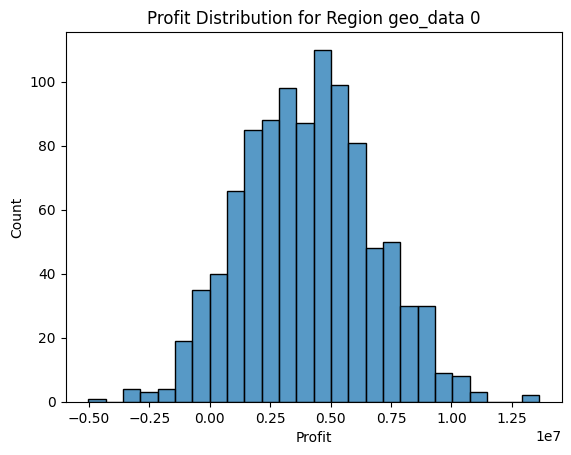

Region geo_data 1
Average profit: 5098464.06
Confidence interval 95%: (949893.8031423447, 9595950.510200808)
Negative profit probability: 0.80%


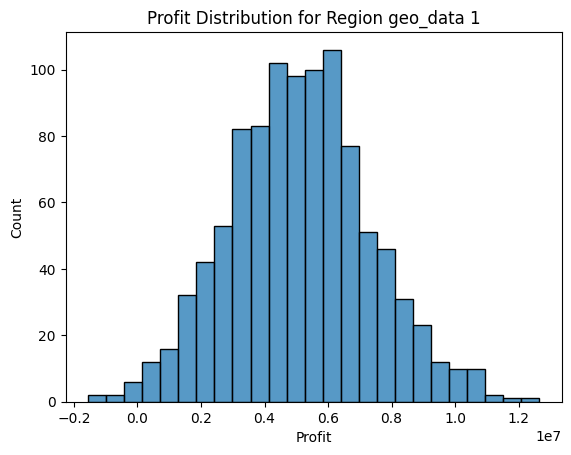

Region geo_data 2
Average profit: 4164221.04
Confidence interval 95%: (-1142146.6281561896, 9518605.203559376)
Negative profit probability: 6.70%


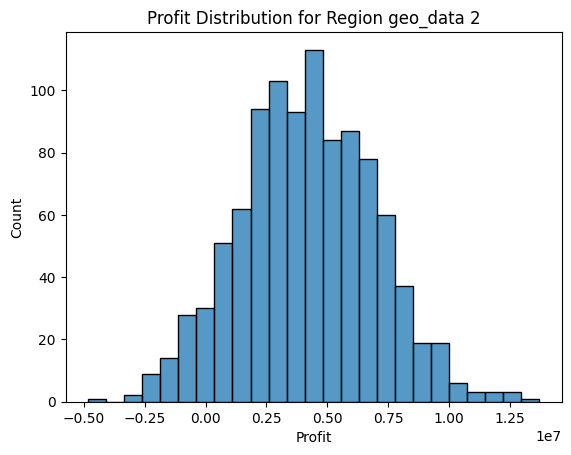

In [310]:

sample_size = 500
bootstrapping_size = 1000

# Loop pelas regiões para calcular os lucros e intervalos de confiança.
for idx, prediction in enumerate([prediction_0, prediction_1, prediction_2]):
    print(f'Region geo_data {idx}')
    profits = [
        profit_calculate(
            sample['y_valid_real'], 
            sample['y_valid_pred']
        ) 
        for sample in [prediction.sample(n=sample_size, replace=True) for _ in range(bootstrapping_size)]
    ]

    profit_aver = np.mean(profits)
    inter_conf_profit = (np.quantile(profits, q=0.025), np.quantile(profits, q=0.975))
    prob_negative_profit = (np.array(profits) < 0).mean()

    # resultados
    print(f'Average profit: {profit_aver:.2f}')
    print(f'Confidence interval 95%: {inter_conf_profit}')
    print(f'Negative profit probability: {prob_negative_profit:.2%}')
    '/n'

    # grafico de distribuição de lucro
    sns.histplot(profits)
    plt.xlabel('Profit')
    plt.title(f'Profit Distribution for Region geo_data {idx}')
    plt.show()


## Conlusão

Ao analisar todos os locais e postos selecionados e considerando a qualidade do modelo de regressão que desenvolvemos, acredito que a melhor região é a segunda. Embora apresente o menor lucro, o modelo é mais preciso do que os demais e considero que essa região tem a menor chance de risco